In [298]:
import pandas as pd
import numpy as np
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [299]:
with open('./workshop_input.csv', 'r', encoding='utf-8') as file:
    dataset = pd.read_csv(file)
features = ['Length', 'Diameter', 'Height', 'Whole_w', 'Shucked_w','Viscera_w', 'Shell_w']
#features = ['Shucked_w','Shell_w']
X = dataset.loc[:,features].values
y = np.asarray(dataset['Rings'])

In [300]:
X

array([[0.455 , 0.365 , 0.095 , ..., 0.2245, 0.101 , 0.15  ],
       [0.35  , 0.265 , 0.09  , ..., 0.0995, 0.0485, 0.07  ],
       [0.53  , 0.42  , 0.135 , ..., 0.2565, 0.1415, 0.21  ],
       ...,
       [0.6   , 0.475 , 0.205 , ..., 0.5255, 0.2875, 0.308 ],
       [0.625 , 0.485 , 0.15  , ..., 0.531 , 0.261 , 0.296 ],
       [0.71  , 0.555 , 0.195 , ..., 0.9455, 0.3765, 0.495 ]])

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
#good practice to have another layer of validation; but we don't consider it this time
#X_trainV, X_testV, y_trainV, y_testV = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [302]:
#Normalize input data
scaler=StandardScaler()
scaler.fit(X)
Norm_Train = scaler.transform(X_train)
Norm_Test = scaler.transform(X_test)

#label y
lb = LabelBinarizer()
lb.fit(y)
y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

In [304]:
#cross validation, number of fold
k = 5

In [305]:
#list of hyperparameters is available in https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#if we dont optimize the parameters, it will goes to default 
param_grid = {
    'criterion': ['gini','entropy'],
    #'max_leaf_nodes': list(range(2, 100)),
    'min_samples_split': [2, 3, 4],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'class_weight':['balanced']
    
}

In [306]:
dt_clf = DecisionTreeClassifier(random_state=40)

In [307]:
dt_clf = GridSearchCV(dt_clf, param_grid, cv = k)
dt_clf = dt_clf.fit(Norm_Train, y_train)

In [308]:
dt_clf.best_params_, dt_clf.best_score_

({'class_weight': 'balanced',
  'criterion': 'entropy',
  'max_depth': 7,
  'min_samples_split': 3},
 0.7452852143247137)

In [309]:
from sklearn.metrics import classification_report
Ts_yhat = dt_clf.predict(Norm_Test)
print(classification_report(y_test, Ts_yhat))

              precision    recall  f1-score   support

           0       0.55      0.80      0.65       276
           1       0.87      0.68      0.76       560

    accuracy                           0.72       836
   macro avg       0.71      0.74      0.71       836
weighted avg       0.77      0.72      0.73       836



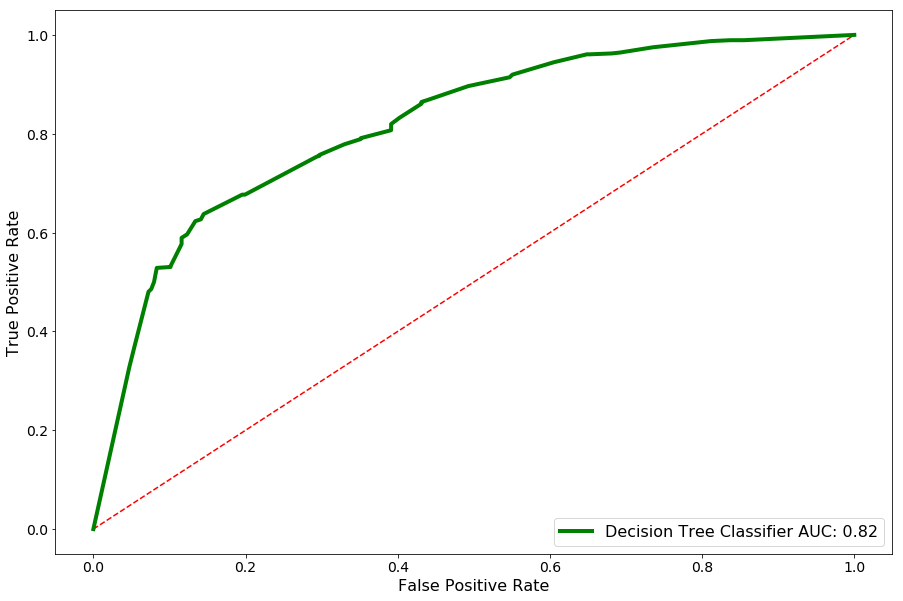

In [310]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 10))
plt.plot([0,1], [0,1], 'r--')

probs_dt = dt_clf.predict_proba(Norm_Test)

# Reading probability of second class
probs_dt = probs_dt[:, 1]

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, probs_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

label_dt = 'Decision Tree Classifier AUC:' + ' {0:.2f}'.format(roc_auc_dt)

plt.plot(fpr_dt, tpr_dt, c = 'g', label = label_dt, linewidth = 4)

plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.title('Receiver Operating Characteristic', fontsize = 16)
plt.legend(loc = 'lower right', fontsize = 16)
plt.show()


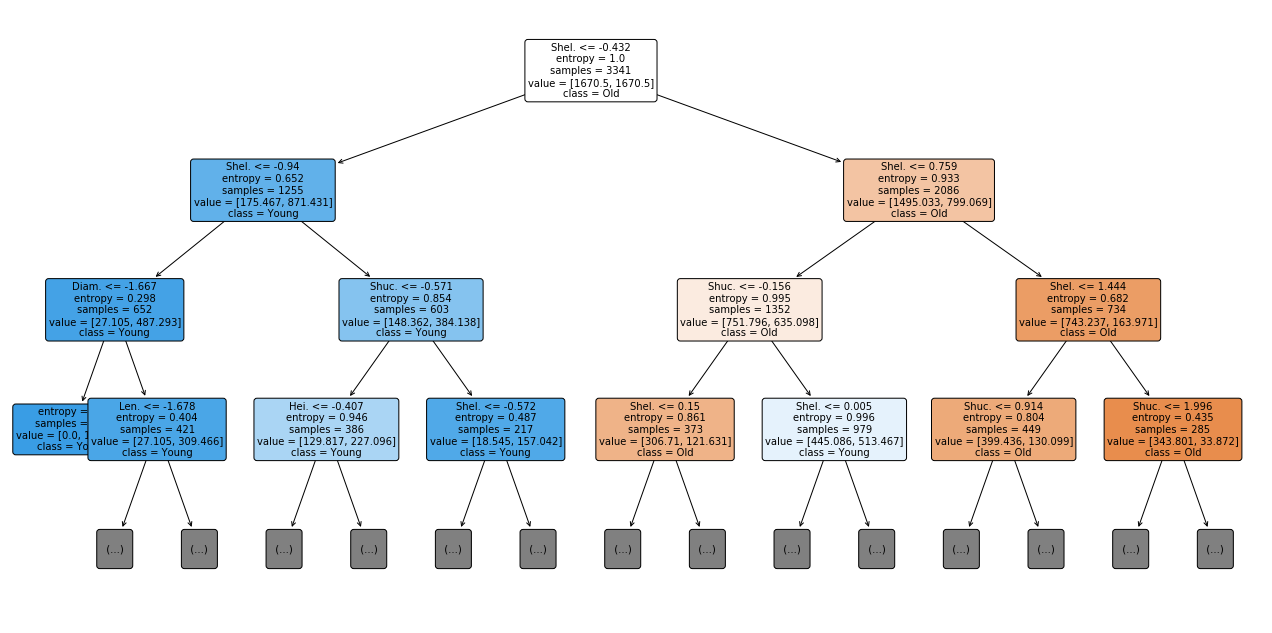

In [311]:
from sklearn import tree
input_name = ['Len.', 'Diam.', 'Hei.', 'Who.', 'Shuc.', 'Visc.', 'Shel.']
plt.figure(figsize = (22, 11))
_ = tree.plot_tree(dt_clf.best_estimator_,
                   feature_names=input_name,
                   class_names=lb.classes_,
                   filled=True,
                   max_depth=3,
                   rounded=True,
                   fontsize=10
                   )
dotfile = open('./decision_tree.dot', 'w')
tree.export_graphviz(dt_clf.best_estimator_, out_file=dotfile, feature_names=input_name, class_names=lb.classes_, label = 'root')
dotfile.close()


In [312]:
with open('./unknown_input.csv', 'r', encoding='utf-8') as file:
    dataset = pd.read_csv(file)

X_new = np.asarray(dataset.loc[:,'Length':'Shell_w'])

In [313]:
X_new

array([[0.41194502, 0.59074465, 1.06688778, 1.62085442, 0.91156795,
        0.06390305, 0.08099204],
       [0.09472474, 0.29343644, 0.84926859, 1.60451978, 0.46492548,
        0.7583596 , 0.046188  ],
       [0.58295986, 0.31690206, 0.47080149, 1.07479112, 1.18671011,
        0.70490784, 0.07360312],
       [0.31188836, 0.2359121 , 0.86429029, 1.67986576, 0.08597569,
        0.15917887, 0.96170174],
       [0.48216963, 0.08994082, 1.11121338, 0.65023764, 0.68416084,
        0.1422931 , 0.0948244 ],
       [0.61193506, 0.14507206, 0.55910627, 1.05286484, 0.20743468,
        0.73314534, 0.6930516 ],
       [0.3861248 , 0.2047509 , 0.35092295, 2.41067227, 0.68499675,
        0.0857494 , 0.24429137],
       [0.39739175, 0.22472317, 0.95468326, 0.05173353, 1.47834849,
        0.7476246 , 0.29299579]])

In [314]:
Norm_new = scaler.transform(X_new)

In [315]:
Norm_new

array([[-0.93311499,  1.84286108, 22.17422119,  1.61546663,  2.48810254,
        -1.06468395, -1.13401357],
       [-3.57488837, -1.15335215, 16.97076546,  1.58215309,  0.47562277,
         5.27153328, -1.38406773],
       [ 0.49107663, -0.91687027,  7.92130208,  0.50180247,  3.72783693,
         4.78383973, -1.18710025],
       [-1.76637517, -1.73307109, 17.32994678,  1.73581681, -1.23184763,
        -0.19538791,  5.19356003],
       [-0.34829263, -3.20414073, 23.23408333, -0.36404952,  1.46345251,
        -0.34945355, -1.03463315],
       [ 0.73237865, -2.64853907, 10.03274292,  0.4570851 , -0.6845782 ,
         5.04147851,  3.26340808],
       [-1.14814278, -2.04710747,  5.05490645,  3.22625395,  1.46721895,
        -0.86535794,  0.03923175],
       [-1.05431293, -1.84583095, 19.49131795, -1.58466367,  5.04189992,
         5.1735872 ,  0.389155  ]])

In [316]:
predict = lb.inverse_transform(dt_clf.predict(Norm_new))

In [317]:
predict

array(['Young', 'Young', 'Young', 'Old', 'Young', 'Old', 'Young', 'Old'],
      dtype='<U5')